In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('istanbul.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28798 entries, 0 to 28797
Data columns (total 50 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Fiyat                                                    28798 non-null  object 
 1   İlan Numarası                                            25939 non-null  float64
 2   İlan Güncelleme Tarihi                                   25939 non-null  object 
 3   Kategorisi                                               25939 non-null  object 
 4   Net Metrekare                                            25888 non-null  object 
 5   Oda Sayısı                                               25888 non-null  object 
 6   Bulunduğu Kat                                            23742 non-null  object 
 7   Isıtma Tipi                                              25904 non-null  object 
 8   Krediye Uygunluk          

In [4]:
silinecek_sutunlar = ['Balkon Tipi Fransız Balkon, Kapalı Balkon, Kapalı Teras',    
                      'Balkon Tipi Kapalı Balkon, Kapalı Teras',
                      'Balkon Tipi Fransız Balkon, Kapalı Balkon',
                      'Balkon Tipi Kapalı Balkon',
                      'Balkon Tipi Fransız Balkon',
                      'Kattaki Daire Sayısı',
                      'Balkon Tipi Kapalı Teras',
                      'Balkon Metrekare',
                      'Parsel',
                      'Ada',
                      'Zemin Etüdü',
                      'Balkon Tipi',
                      'Balkon Sayısı',
                      'Görüntülü Gezilebilir mi?',
                      'Pafta',
                      'WC Sayısı',
                      'Balkon Durumu',
                      'Kira Getirisi',
                      'Yapı Tipi',
                      'WC Metrekare',
                      'Salon Metrekare',
                      'Banyo Metrekare',
                      'Aidat',
                      'İpotek Durumu',
                      'Yatırıma Uygunluk',
                      'Eşya Durumu',
                      'URL',
                      'Yapı Durumu',
                      'Türü',
                      'İlan Oluşturma Tarihi',
                      'Fiyat Durumu',
                      'Takas',
                      'Tapu Durumu',
                      'Krediye Uygunluk',
                      'Kategorisi',
                      'İlan Güncelleme Tarihi',
                      'İlan Numarası',
                      'Kullanım Durumu',
                      'Brüt Metrekare',
                      'Banyo Sayısı']

silinecek_sutunlar = [sutun for sutun in silinecek_sutunlar if sutun in df.columns]

if silinecek_sutunlar:
    df.drop(columns=silinecek_sutunlar, inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28798 entries, 0 to 28797
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fiyat               28798 non-null  object 
 1   Net Metrekare       25888 non-null  object 
 2   Oda Sayısı          25888 non-null  object 
 3   Bulunduğu Kat       23742 non-null  object 
 4   Isıtma Tipi         25904 non-null  object 
 5   Tipi                25939 non-null  object 
 6   Binanın Yaşı        25901 non-null  object 
 7   Binanın Kat Sayısı  25345 non-null  float64
 8   Site İçerisinde     25939 non-null  object 
 9   Bina Konumu         28798 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.2+ MB


In [6]:
df['Fiyat_Temp'] = pd.to_numeric(
    df['Fiyat']
    .str.replace(r'[\.TL]', '', regex=True)
    .str.replace(',', '', regex=False),
    errors='coerce'  # Hatalı değerleri NaN olarak işaretler
)
print(df[df['Fiyat_Temp'].isnull()]['Fiyat'])


15         3,620,000TLarrow_downward%3
21                    Fiyat bulunamadı
48         3,920,000TLarrow_downward%2
60                    Fiyat bulunamadı
64                    Fiyat bulunamadı
                     ...              
28761      6,950,000TLarrow_downward%4
28763      8,000,000TLarrow_downward%6
28766                 Fiyat bulunamadı
28773    21,500,000TLarrow_downward%10
28778                 Fiyat bulunamadı
Name: Fiyat, Length: 4558, dtype: object


In [7]:
# Geçersiz satırları sil
df = df.dropna(subset=['Fiyat_Temp'])

# Fiyat sütununu temizleyip sayısal formata dönüştür
df['Fiyat'] = df['Fiyat_Temp']
df.drop(columns=['Fiyat_Temp'], inplace=True)


In [8]:
df['Fiyat'] = df['Fiyat'].astype(str)

# 1. Fiyat sütununu temizleme
df['Fiyat'] = (
    df['Fiyat']
    .str.replace(r'[\.TL]', '', regex=True)  # Nokta ve TL karakterlerini kaldırır
    .str.replace(',', '', regex=False)
    .astype(float)  # Sayısal formata dönüştürür
)

df['Fiyat'].info()

<class 'pandas.core.series.Series'>
Index: 24240 entries, 0 to 28797
Series name: Fiyat
Non-Null Count  Dtype  
--------------  -----  
24240 non-null  float64
dtypes: float64(1)
memory usage: 378.8 KB


In [9]:
df['Tipi'].unique()

array(['Daire', 'Villa', 'Residence', 'Müstakil Ev', 'Bina',
       'Yalı Dairesi', 'Yalı', 'Kooperatif', 'Prefabrik', 'Çiftlik Evi',
       'Köşk', 'Köy Evi', 'Yazlık', 'Dağ Evi'], dtype=object)

In [10]:
df = df[df['Tipi'] == 'Daire']

df['Tipi'].unique()

array(['Daire'], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21688 entries, 0 to 28797
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fiyat               21688 non-null  float64
 1   Net Metrekare       21644 non-null  object 
 2   Oda Sayısı          21650 non-null  object 
 3   Bulunduğu Kat       21655 non-null  object 
 4   Isıtma Tipi         21664 non-null  object 
 5   Tipi                21688 non-null  object 
 6   Binanın Yaşı        21662 non-null  object 
 7   Binanın Kat Sayısı  21312 non-null  float64
 8   Site İçerisinde     21688 non-null  object 
 9   Bina Konumu         21688 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.8+ MB


In [12]:
df.drop(columns=['Tipi'], inplace=True)

In [13]:
# Tüm değerleri string formatına dönüştürerek hata almadan işlem yapabilirsiniz
df['Oda Sayısı'] = (
    df['Oda Sayısı']
    .astype(str)  # Tüm değerleri string formata çevirir
    .str.extract(r'(\d+)\s*\+\s*(\d+)')  # Oda ve salon sayısını ayırır
    .astype(float)  # Sayısal formata çevirir
    .sum(axis=1)  # Her satırdaki oda ve salon değerlerini toplar
)
df['Oda Sayısı'].info()

<class 'pandas.core.series.Series'>
Index: 21688 entries, 0 to 28797
Series name: Oda Sayısı
Non-Null Count  Dtype  
--------------  -----  
21688 non-null  float64
dtypes: float64(1)
memory usage: 338.9 KB


In [14]:
# Boş değerleri yöneterek hatayı çözme
df['Net Metrekare'] = (
    df['Net Metrekare']
    .astype(str)  # Tüm değerleri stringe çevir
    .str.replace(r'[^\d]', '', regex=True)  # Sadece rakamları tut
    .replace('', float('nan'))  # Boş stringleri NaN olarak değiştir
    .astype(float)  # Sayıya çevir
)
df['Net Metrekare'].info()

<class 'pandas.core.series.Series'>
Index: 21688 entries, 0 to 28797
Series name: Net Metrekare
Non-Null Count  Dtype  
--------------  -----  
21644 non-null  float64
dtypes: float64(1)
memory usage: 338.9 KB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21688 entries, 0 to 28797
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fiyat               21688 non-null  float64
 1   Net Metrekare       21644 non-null  float64
 2   Oda Sayısı          21688 non-null  float64
 3   Bulunduğu Kat       21655 non-null  object 
 4   Isıtma Tipi         21664 non-null  object 
 5   Binanın Yaşı        21662 non-null  object 
 6   Binanın Kat Sayısı  21312 non-null  float64
 7   Site İçerisinde     21688 non-null  object 
 8   Bina Konumu         21688 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.7+ MB


In [16]:
df['Bulunduğu Kat'].unique()

array(['4.Kat', '3.Kat', '5.Kat', '17.Kat', '2.Kat', 'Yüksek Giriş',
       'Kot 1 (-1).Kat', 'Bahçe Katı', 'Kot 3 (-3).Kat', '1.Kat',
       'Çatı Katı', '12.Kat', '10.Kat', '18.Kat', 'Düz Giriş (Zemin)',
       '7.Kat', '11.Kat', '6.Kat', 'Bahçe Dublex', '8.Kat',
       'Çatı Dubleks', 'Bodrum Kat', '26.Kat', '13.Kat', '14.Kat',
       '9.Kat', 'Müstakil', '16.Kat', '15.Kat', 'Kot 4 (-4).Kat',
       'Kot 2 (-2).Kat', '25.Kat', '19.Kat', '20.Kat', '30.Kat', '27.Kat',
       '21.Kat', '22.Kat', nan, 'Villa Tipi', '24.Kat', '29.Kat',
       '23.Kat', '34.Kat', '28.Kat', '31.Kat'], dtype=object)

In [17]:
import numpy as np

def kat_cevirmeyi(satir):
    if isinstance(satir, str):
        satir = satir.strip()
        if 'Kot' in satir:
            try:
                kot_seviye = int(satir.split('(')[1].split(')')[0])
                return kot_seviye  # İlk adımda direkt kot seviyesi döndürülür
            except (IndexError, ValueError):
                return np.nan
        elif 'Kat' in satir:
            sayi = ''.join(filter(str.isdigit, satir))
            return int(sayi) if sayi else np.nan
        elif 'Zemin' in satir or 'Düz Giriş' in satir:
            return 0
        elif 'Bodrum' in satir:
            return -1
        elif 'Yüksek Giriş' in satir:
            return 1
        else:
            return np.nan
    return np.nan

# Kot düzeltmesi için en alt kot seviyesini 0 yap
def kot_duzeltmesi(df):
    kot_degerleri = df['Bulunduğu Kat'].dropna()
    min_kot = kot_degerleri.min()
    if min_kot < 0:
        df['Bulunduğu Kat'] = df['Bulunduğu Kat'].apply(lambda x: x - min_kot if x < 0 else x)
    return df

# 'Bulunduğu Kat' sütununu dönüştür ve kot düzeltmesini uygula
df['Bulunduğu Kat'] = df['Bulunduğu Kat'].apply(kat_cevirmeyi)
df["Bulunduğu Kat"] = df["Bulunduğu Kat"].apply(lambda x: x + 4 if pd.notnull(x) else x)
df = kot_duzeltmesi(df)

print(df.head())  # İlk birkaç satırı görüntüler
print(df.info())  # DataFrame hakkında genel bilgi verir




         Fiyat  Net Metrekare  Oda Sayısı  Bulunduğu Kat       Isıtma Tipi  \
0  137500000.0          220.0         5.0            8.0    Kombi Doğalgaz   
1   53250000.0          110.0         4.0            7.0  Merkezi Doğalgaz   
2   48000000.0           68.0         2.0            7.0    Kombi Doğalgaz   
3   55000000.0          140.0         5.0            9.0    Kombi Doğalgaz   
4   67500000.0           90.0         4.0            9.0    Kombi Doğalgaz   

  Binanın Yaşı  Binanın Kat Sayısı Site İçerisinde  \
0        11-15                 4.0           Hayır   
1     0 (Yeni)                 9.0            Evet   
2  21 Ve Üzeri                 5.0           Hayır   
3        11-15                 5.0           Hayır   
4     0 (Yeni)                 6.0           Hayır   

                                    Bina Konumu  
0   İstanbul - Eyüpsultan - Rami Cuma Mahallesi  
1     İstanbul - Bağcılar - Demirkapı Mahallesi  
2      İstanbul - Sarıyer - Büyükdere Mahallesi  
3     

In [18]:
df = df.dropna(subset=['Bulunduğu Kat'])
df['Bulunduğu Kat'].isna().sum()

0

In [19]:
df.isna().sum()

Fiyat                   0
Net Metrekare          41
Oda Sayısı              0
Bulunduğu Kat           0
Isıtma Tipi            20
Binanın Yaşı           21
Binanın Kat Sayısı    326
Site İçerisinde         0
Bina Konumu             0
dtype: int64

In [20]:
df['Binanın Yaşı'].unique()

array(['11-15', '0 (Yeni)', '21 Ve Üzeri', '4', '5-10', '3', '16-20', '2',
       '1', nan], dtype=object)

In [21]:
df['Binanın Yaşı'] = (
    df['Binanın Yaşı']
    .astype(str)  # Sütunu string'e çevir
    .str.replace(r'[^\d]', '', regex=True)  # Sadece rakamları tut
    .replace('', np.nan)  # Boş stringleri NaN ile değiştir
)

# Eksik değerleri kaldır
df = df.dropna(subset=['Binanın Yaşı'])

# Sayısal formata çevir
df['Binanın Yaşı'] = df['Binanın Yaşı'].astype(float)

df['Binanın Yaşı'] = df['Binanın Yaşı'].apply(
    lambda x: 13.0 if x == 1115 else (7.0 if x == 510 else x)
)

df['Binanın Yaşı'].head()

0    13.0
1     0.0
2    21.0
3    13.0
4     0.0
Name: Binanın Yaşı, dtype: float64

In [22]:
df['Site İçerisinde'].unique()

array(['Hayır', 'Evet'], dtype=object)

In [23]:
df['Site İçerisinde'] = df['Site İçerisinde'].map({'Evet': 1, 'Hayır': 0})

df['Site İçerisinde'].unique()

array([0, 1], dtype=int64)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19139 entries, 0 to 28797
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fiyat               19139 non-null  float64
 1   Net Metrekare       19098 non-null  float64
 2   Oda Sayısı          19139 non-null  float64
 3   Bulunduğu Kat       19139 non-null  float64
 4   Isıtma Tipi         19119 non-null  object 
 5   Binanın Yaşı        19139 non-null  float64
 6   Binanın Kat Sayısı  18813 non-null  float64
 7   Site İçerisinde     19139 non-null  int64  
 8   Bina Konumu         19139 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.5+ MB


In [25]:
df['Bina Konumu']

0           İstanbul - Eyüpsultan - Rami Cuma Mahallesi
1             İstanbul - Bağcılar - Demirkapı Mahallesi
2              İstanbul - Sarıyer - Büyükdere Mahallesi
3              İstanbul - Ümraniye - İstiklal Mahallesi
4          İstanbul - Bayrampaşa - Kartaltepe Mahallesi
                              ...                      
28791                İstanbul - Şişli - İnönü Mahallesi
28792    İstanbul - Sultanbeyli - Turgut Reis Mahallesi
28794            İstanbul - Bağcılar - Bağlar Mahallesi
28795      İstanbul - Beylikdüzü - Cumhuriyet Mahallesi
28797           İstanbul - Maltepe - Fındıklı Mahallesi
Name: Bina Konumu, Length: 19139, dtype: object

In [26]:
# 1. Konumu ayrıştırma
df[['İl', 'İlçe', 'Mahalle']] = (
    df['Bina Konumu']
    .str.split(' - ', expand=True)  # İl, İlçe, Mahalle olarak ayırır
)

# 2. 'Konum' sütununu silme
df.drop('Bina Konumu', axis=1, inplace=True)

df[['İl', 'İlçe', 'Mahalle']].head()

,İl,İlçe,Mahalle
0,İstanbul,Eyüpsultan,Rami Cuma Mahallesi
1,İstanbul,Bağcılar,Demirkapı Mahallesi
2,İstanbul,Sarıyer,Büyükdere Mahallesi
3,İstanbul,Ümraniye,İstiklal Mahallesi
4,İstanbul,Bayrampaşa,Kartaltepe Mahallesi


# Encoding

In [28]:
df.drop('İl', axis=1, inplace=True)

# 3. İlçeleri puanlama
ilce_ortalamalari = df.groupby('İlçe')['Fiyat'].mean().sort_values(ascending=False)
ilce_puanlari = {ilce: puan for puan, ilce in enumerate(ilce_ortalamalari.index, start=1)}

# 4. İlçeleri encode etme (puanlama)
df['İlçe Puan'] = df['İlçe'].map(ilce_puanlari)

# 6. 'Bina Konumu' ve 'İlçe' sütunlarını kaldırma
df.drop(['İlçe'], axis=1, inplace=True)

# Mahalle bazında ortalama fiyatları hesapla ve sıralı puanlar ata
mahalle_ortalamalari = df.groupby('Mahalle')['Fiyat'].mean().sort_values(ascending=False)
mahalle_puanlari = {mahalle: puan for puan, mahalle in enumerate(mahalle_ortalamalari.index, start=1)}

# Mahalleleri puanlara göre encode et
df['Mahalle Puan'] = df['Mahalle'].map(mahalle_puanlari)

# Sonuçları kontrol et
df.drop(['Mahalle'],axis=1,inplace=True)



In [29]:
# Object türündeki sütunlar için One-Hot Encoding
object_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=object_columns, drop_first=True)

# Kontrol
print(df.head())


         Fiyat  Net Metrekare  Oda Sayısı  Bulunduğu Kat  Binanın Yaşı  \
0  137500000.0          220.0         5.0            8.0          13.0   
1   53250000.0          110.0         4.0            7.0           0.0   
2   48000000.0           68.0         2.0            7.0          21.0   
3   55000000.0          140.0         5.0            9.0          13.0   
4   67500000.0           90.0         4.0            9.0           0.0   

   Binanın Kat Sayısı  Site İçerisinde  İlçe Puan  Mahalle Puan  \
0                 4.0                0         15           171   
1                 9.0                1         31           264   
2                 5.0                0          6           337   
3                 5.0                0         22           247   
4                 6.0                0         28           240   

   Isıtma Tipi_Elektrikli Radyatör  ...  Isıtma Tipi_Kombi Fueloil  \
0                            False  ...                      False   
1           

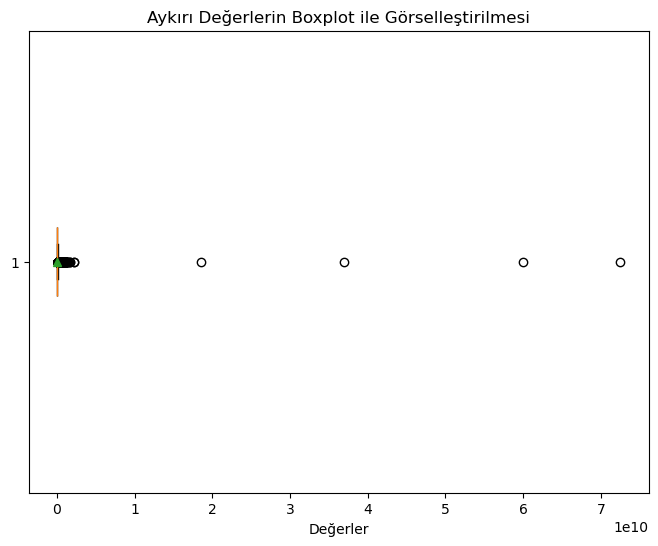

In [30]:
# Boxplot oluşturma
plt.figure(figsize=(8, 6))
plt.boxplot(df['Fiyat'], vert=False, patch_artist=True, showmeans=True)
plt.title("Aykırı Değerlerin Boxplot ile Görselleştirilmesi")
plt.xlabel("Değerler")
plt.show()


In [31]:
# Sayısal sütunları seç
numeric_columns = df.select_dtypes(include=['number']).columns

# IQR yöntemine göre aykırı değerleri sınırla
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound


C:\Users\codef\AppData\Local\Temp\ipykernel_11016\910642364.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-241.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound


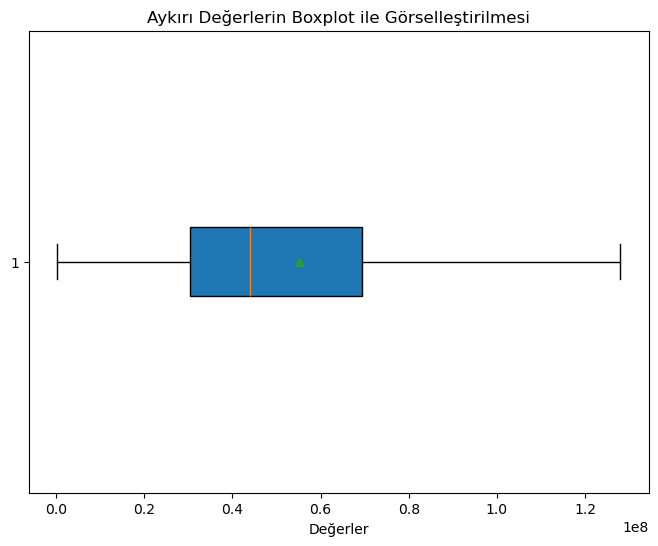

In [32]:
# Boxplot oluşturma
plt.figure(figsize=(8, 6))
plt.boxplot(df['Fiyat'], vert=False, patch_artist=True, showmeans=True)
plt.title("Aykırı Değerlerin Boxplot ile Görselleştirilmesi")
plt.xlabel("Değerler")
plt.show()

In [33]:
df = df.dropna()

df['Net Metrekare * Oda Sayısı'] = df['Net Metrekare'] * df['Oda Sayısı']
df['Birim Metrakare Fiyatı'] = df['Fiyat'] / df['Net Metrekare']
df['Ortalama Oda Büyüklüğü'] = df['Net Metrekare'] / df['Oda Sayısı']



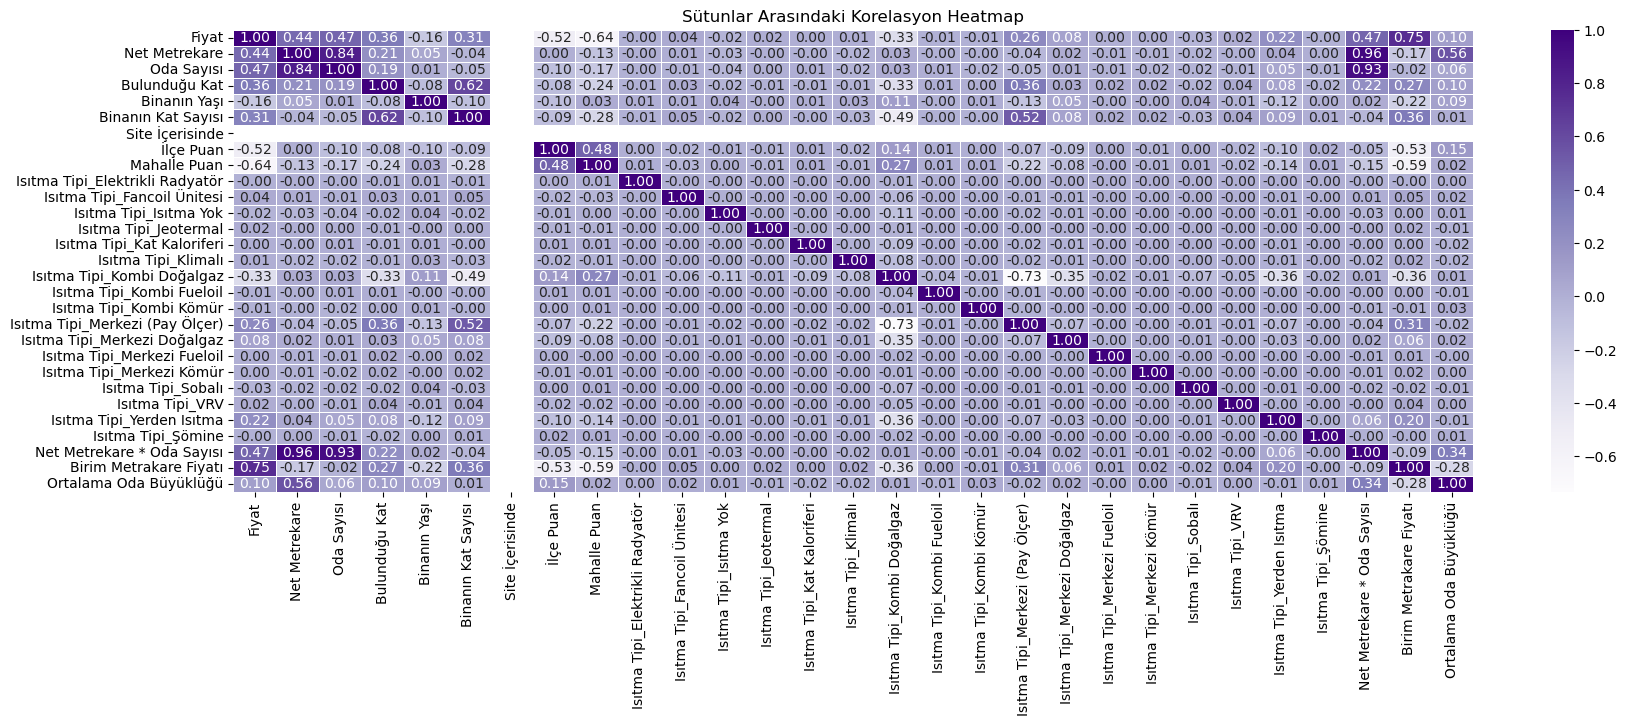

In [34]:

correlation_matrix = df.corr()
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Purples', linewidths=0.5)
plt.title("Sütunlar Arasındaki Korelasyon Heatmap")
plt.show()


In [35]:
from sklearn.model_selection import train_test_split

# Hedef değişken
y = df['Fiyat']

# Özellikler (Fiyat dışındaki sütunlar)
X =  df.drop(columns=['Fiyat'])

X_kmeans = X.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)


In [36]:
from sklearn.ensemble import RandomForestRegressor

# Model oluşturma
model = RandomForestRegressor(random_state=42)

# Modeli eğitme
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [37]:
y_pred = model.predict(X_test)


In [38]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 1819527900465.3933
R2: 0.9984199760151579


In [39]:
len(df.columns)

29

# XGBOOST MODEL EĞİTİMİ VE GRAFİKSELLEŞTİRME

In [41]:
from xgboost import XGBRegressor

# Model tanımlama
xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_xgb_pred = xgb_model.predict(X_test)
print(f"R² Skoru (XGBoost): {r2_score(y_test, y_xgb_pred)}")
print(f"MSE (XGBoost): {mean_squared_error(y_test, y_xgb_pred)}")


R² Skoru (XGBoost): 0.9942078341164385
MSE (XGBoost): 6670156611778.842


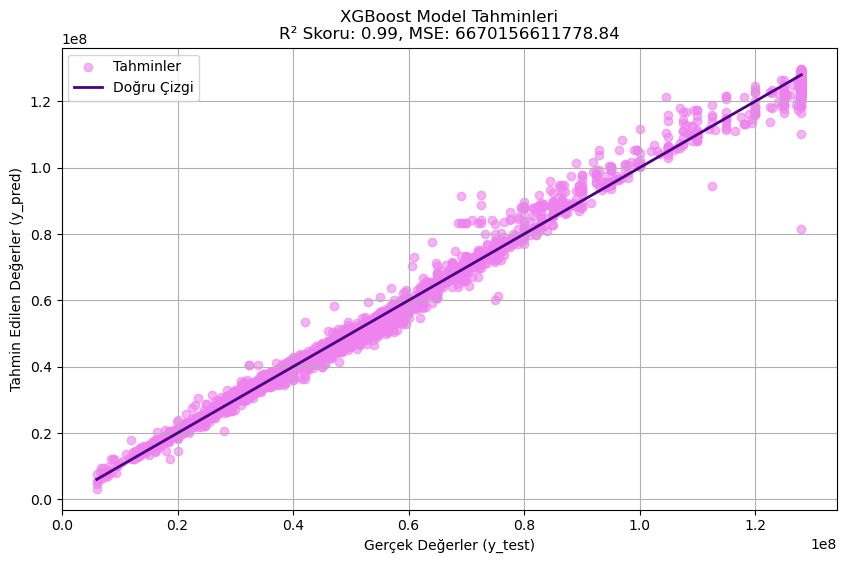

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Tahmin ve değerlendirme metrikleri
y_xgb_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_xgb_pred)
mse = mean_squared_error(y_test, y_xgb_pred)

# Scatter plot: Gerçek değerler vs. Tahminler
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_xgb_pred, alpha=0.6, color='violet', label='Tahminler')  # Gerçek vs Tahmin
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='indigo', linewidth=2, label='Doğru Çizgi')  # Doğru çizgi
plt.title(f'XGBoost Model Tahminleri\nR² Skoru: {r2:.2f}, MSE: {mse:.2f}')
plt.xlabel('Gerçek Değerler (y_test)')
plt.ylabel('Tahmin Edilen Değerler (y_pred)')
plt.legend()
plt.grid(True)
plt.show()


# Random Forest Model Eğitimi

In [44]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 3. Modeli Eğitme
rf_model.fit(X_train, y_train)

# 4. Tahmin Yapma
y_pred = rf_model.predict(X_test)

# 5. Performans Değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² Skoru: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

R² Skoru: 0.9984199760151579
Mean Squared Error (MSE): 1819527900465.3933


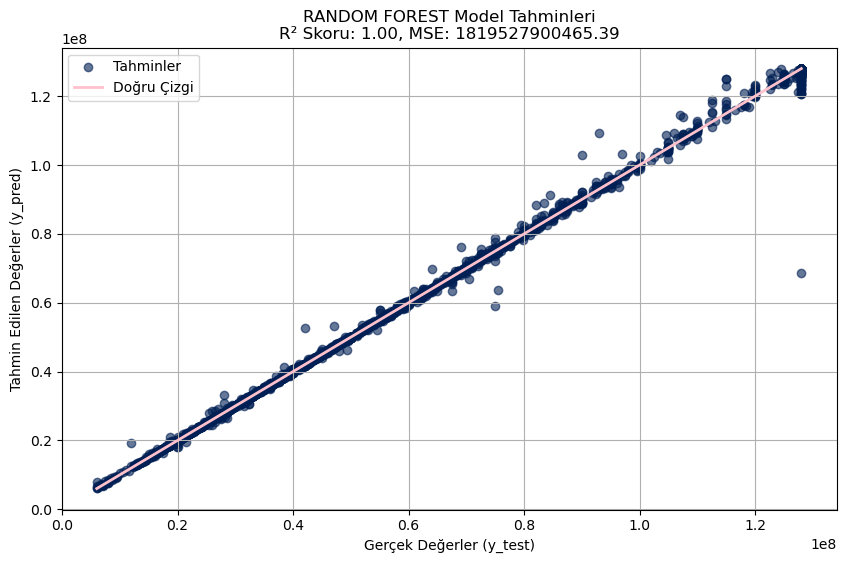

In [45]:
# Scatter plot: Gerçek değerler vs. Tahminler
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='#001F54', label='Tahminler')  # Gerçek vs Tahmin
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#FFC1CC', linewidth=2, label='Doğru Çizgi')  # Doğru çizgi
plt.title(f'RANDOM FOREST Model Tahminleri\nR² Skoru: {r2:.2f}, MSE: {mse:.2f}')
plt.xlabel('Gerçek Değerler (y_test)')
plt.ylabel('Tahmin Edilen Değerler (y_pred)')
plt.legend()
plt.grid(True)
plt.show()



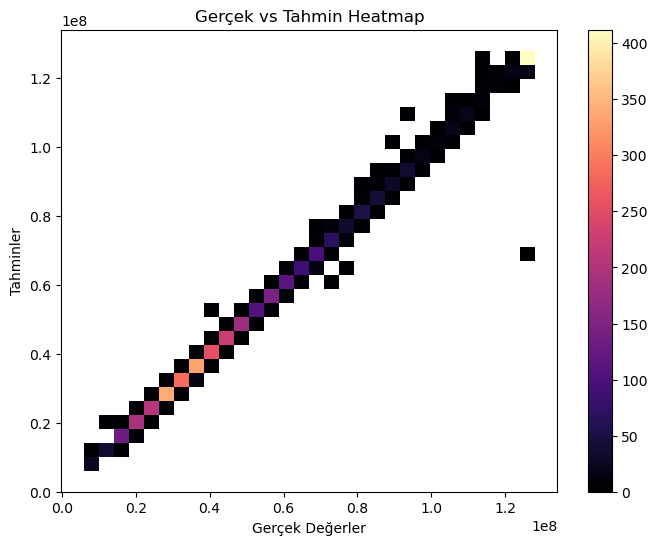

In [46]:
# Gerçek ve tahmin değerlerinin bir 2D histogramını çizme
plt.figure(figsize=(8, 6))
sns.histplot(x=y_test, y=y_pred, bins=30, cmap="magma", cbar=True)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Gerçek vs Tahmin Heatmap")
plt.show()


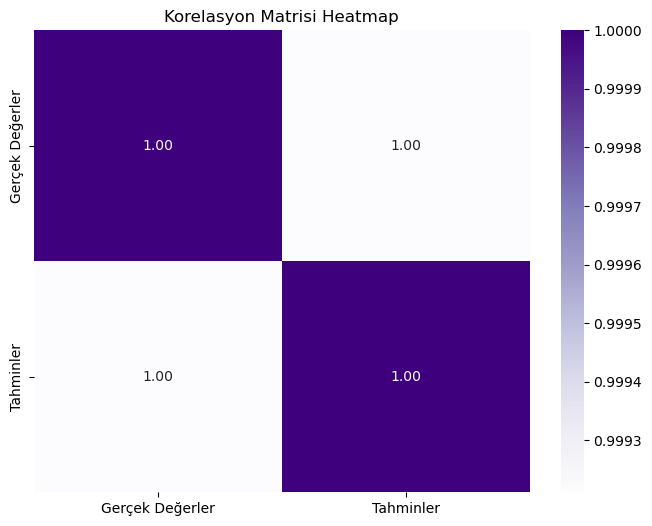

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gerçek ve tahmin değerlerini DataFrame'e ekleme
results_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahminler': y_pred})

# Korelasyon matrisi oluşturma
correlation_matrix = results_df.corr()

# Korelasyon matrisi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt=".2f")
plt.title("Korelasyon Matrisi Heatmap")
plt.show()


# Decision Tree Model Eğitimi

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model oluşturma
dt_model = DecisionTreeRegressor(random_state=42)

# Modeli eğitme
dt_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_dt = dt_model.predict(X_test)

# Performans değerlendirme
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree R² Skoru: {r2_dt}")
print(f"Decision Tree Mean Squared Error (MSE): {mse_dt}")


Decision Tree R² Skoru: 0.9971526716918915
Decision Tree Mean Squared Error (MSE): 3278933325120.4795


# Gradient Boosting Model Eğitimi

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

# Model oluşturma
gb_model = GradientBoostingRegressor(random_state=42)

# Modeli eğitme
gb_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_gb = gb_model.predict(X_test)

# Performans değerlendirme
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting R² Skoru: {r2_gb}")
print(f"Gradient Boosting Mean Squared Error (MSE): {mse_gb}")


Gradient Boosting R² Skoru: 0.9946947154520088
Gradient Boosting Mean Squared Error (MSE): 6109472607748.04


# CatBoost Model Eğitimi

In [53]:
from catboost import CatBoostRegressor

# Model oluşturma
cat_model = CatBoostRegressor(verbose=0, random_state=42)

# Modeli eğitme
cat_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_cat = cat_model.predict(X_test)

# Performans değerlendirme
mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

print(f"CatBoost R² Skoru: {r2_cat}")
print(f"CatBoost Mean Squared Error (MSE): {mse_cat}")


CatBoost R² Skoru: 0.9988114553585983
CatBoost Mean Squared Error (MSE): 1368707156806.317


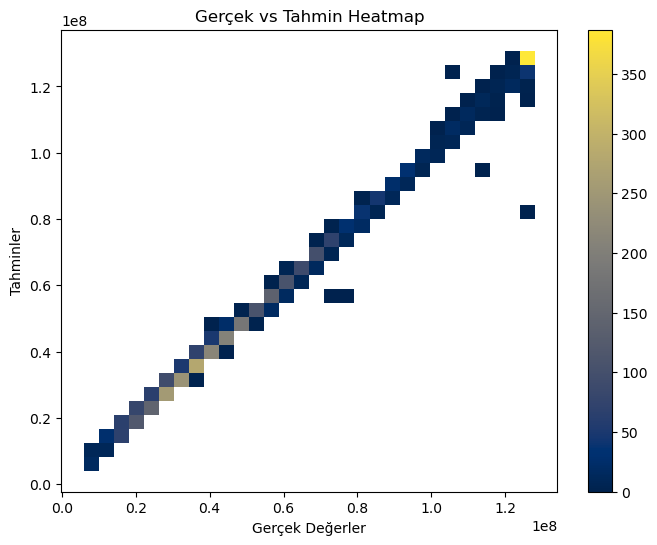

In [54]:
# Gerçek ve tahmin değerlerinin bir 2D histogramını çizme
plt.figure(figsize=(8, 6))
sns.histplot(x=y_test, y=y_pred_cat, bins=30, cmap="cividis", cbar=True)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Gerçek vs Tahmin Heatmap")
plt.show()


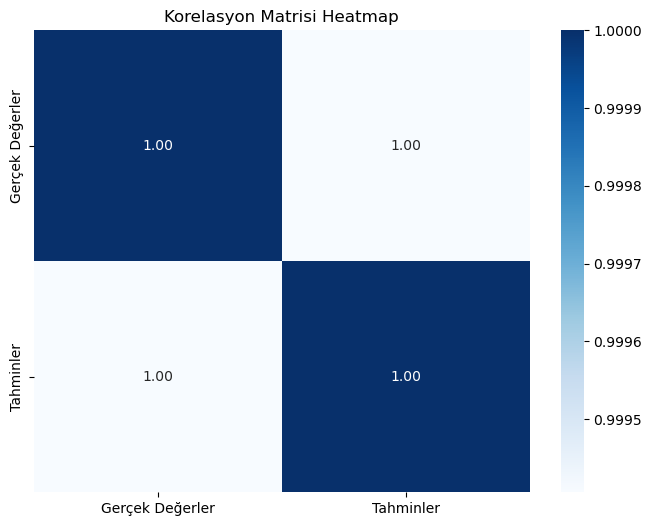

In [55]:


# Gerçek ve tahmin değerlerini DataFrame'e ekleme
results_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahminler': y_pred_cat})

# Korelasyon matrisi oluşturma
correlation_matrix = results_df.corr()

# Korelasyon matrisi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Korelasyon Matrisi Heatmap")
plt.show()


# KÜMELEME

In [57]:
# Eksik sütunları ve dönüşümleri kontrol edin
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18772 entries, 0 to 28797
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Fiyat                            18772 non-null  float64
 1   Net Metrekare                    18772 non-null  float64
 2   Oda Sayısı                       18772 non-null  float64
 3   Bulunduğu Kat                    18772 non-null  float64
 4   Binanın Yaşı                     18772 non-null  float64
 5   Binanın Kat Sayısı               18772 non-null  float64
 6   Site İçerisinde                  18772 non-null  int64  
 7   İlçe Puan                        18772 non-null  int64  
 8   Mahalle Puan                     18772 non-null  float64
 9   Isıtma Tipi_Elektrikli Radyatör  18772 non-null  bool   
 10  Isıtma Tipi_Fancoil Ünitesi      18772 non-null  bool   
 11  Isıtma Tipi_Isıtma Yok           18772 non-null  bool   
 12  Isıtma Tipi_Jeotermal  


Küme Bazlı Ortalama Fiyatlar:
Cluster
0    3.629413e+07
1    7.975673e+07
2    7.299189e+07
Name: Fiyat, dtype: float64

Mean Squared Error (MSE): 323233937803483.25
R² Score: 0.7071068180819347


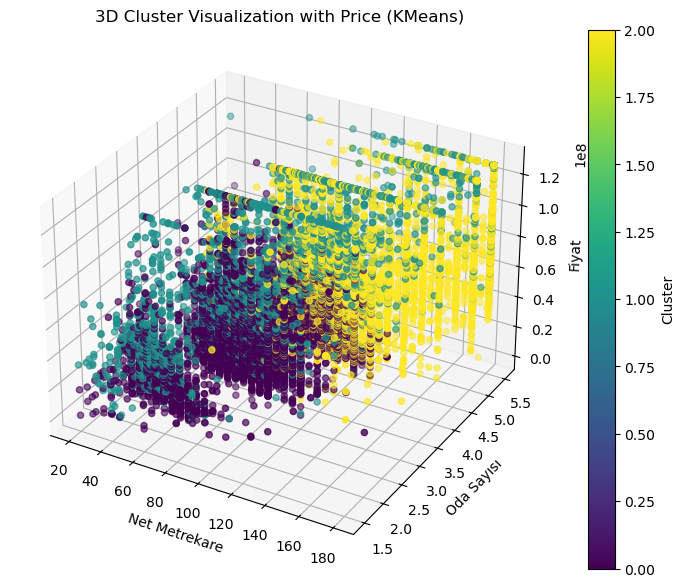

In [118]:
# Veriyi hazırlama
features = ['Net Metrekare', 'Oda Sayısı', 'Bulunduğu Kat', 'Binanın Yaşı', 'Binanın Kat Sayısı',
            'Site İçerisinde', 'İlçe Puan', 'Mahalle Puan'] + \
           [col for col in df.columns if 'Isıtma Tipi_' in col]

X = df[features]
y = df['Fiyat']

# Verilerin ölçeklenmesi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans ile kümeleme
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # Küme sayısını veri setinize göre ayarlayın
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Her küme için ortalama fiyat
print("\nKüme Bazlı Ortalama Fiyatlar:")
print(df.groupby('Cluster')['Fiyat'].mean())

# Gürültüleri çıkarma işlemi yapılmadığı için tüm veri seti kullanılabilir

# Regresyon için özellikler ve hedef değişken
X = df[features + ['Cluster']]
y = df['Fiyat']

# Eğitim ve test veri setlerinin ayrılması
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresyon modeli
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin ve performans değerlendirme
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# 3D Görselleştirme
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['Net Metrekare'], df['Oda Sayısı'], df['Fiyat'], c=df['Cluster'], cmap='viridis')
plt.colorbar(sc, label='Cluster')
ax.set_xlabel('Net Metrekare')
ax.set_ylabel('Oda Sayısı')
ax.set_zlabel('Fiyat')
plt.title('3D Cluster Visualization with Price (KMeans)')
plt.show()


In [60]:
df.to_csv('islenmis_veri.csv', index=False)